# Advanced Lane Finding

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

# Import Everything

In [1]:
# Import everything
import os
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Adding the Plotter Utility

In [2]:
import src.plotter_util as pltu

# Look at the images

camera_cal/calibration1.jpg
camera_cal/calibration10.jpg
camera_cal/calibration11.jpg
camera_cal/calibration12.jpg
camera_cal/calibration13.jpg
camera_cal/calibration14.jpg
camera_cal/calibration15.jpg
camera_cal/calibration16.jpg
camera_cal/calibration17.jpg
camera_cal/calibration18.jpg
camera_cal/calibration19.jpg
camera_cal/calibration2.jpg
camera_cal/calibration20.jpg
camera_cal/calibration3.jpg
camera_cal/calibration4.jpg
camera_cal/calibration5.jpg
camera_cal/calibration6.jpg
camera_cal/calibration7.jpg
camera_cal/calibration8.jpg
camera_cal/calibration9.jpg


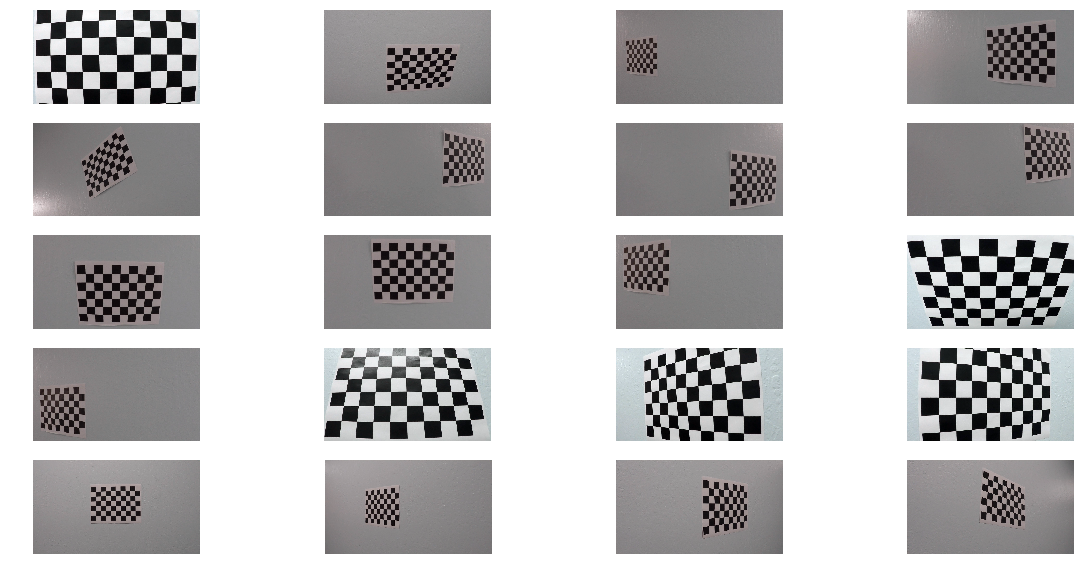

In [3]:
import matplotlib.gridspec as gridspec

images = glob.glob('camera_cal/calibration*.jpg')

plt.figure(figsize=(20, 10))

for idx, fname in enumerate(images):
    print(fname)
    img = cv2.imread(fname)

    plt.subplot(len(images)//4, 4, idx+1)
    plt.imshow(img)
    plt.axis("off")

# Calibrate the Camera

### Import the Camera calibrator

In [4]:
import src.camera_calibrator as ccb

### Finding the chessboard corners

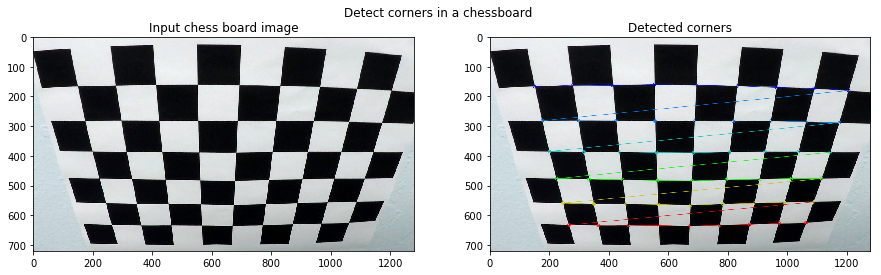

In [6]:
nx=9
ny=6

image = cv2.imread('./camera_cal/calibration2.jpg')
copied_image = image.copy() # to be useful in plotting as the image will be changed by the below function
image_corners = ccb.find_and_draw_chessboard_corner_for_image(image, nx=nx, ny=ny)
pltu.plot_compare_two_images(copied_image, image_corners, 
                             suptitle='Detect corners in a chessboard', 
                             subtitle1='Input chess board image', subtitle2='Detected corners',
                            is_save=True, save_path="./output_images/chessboard_corners1.png")


### Finding Corners for All Images - Get image and object points

In [8]:
image_file_pattern='./camera_cal/calibration*.jpg'
objpoints, imgpoints, image_size = ccb.find_chessboard_corners(image_file_pattern, nx=nx, ny=ny)

### Camera matrix and distortion coefficients
To calibrate a camera, we use multiple chessboard images, and compute camera matrix and distortion coefficients.

In [10]:
mtx, dist = ccb.calibrate_camera(image_file_pattern,nx=nx,  ny=ny)

# Undistort the Image

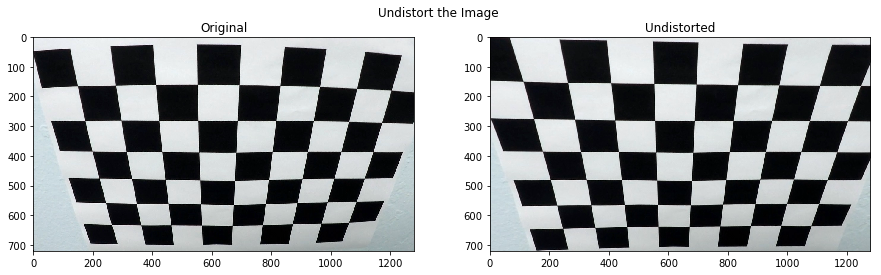

In [11]:
image = cv2.imread('./camera_cal/calibration2.jpg')
undist_image = cv2.undistort(image, mtx, dist, None, mtx) # OR we can use ccb.undistort_image(image, mtx, dist)

pltu.plot_compare_two_images(image, undist_image, 
                             suptitle='Undistort the Image', 
                             subtitle1='Original', subtitle2='Undistorted',
                            is_save=True, save_path="./output_images/chessboard_undistort.png")

# Working with the Test Images i.e. Lane Image data now

## Undistort the Test Images

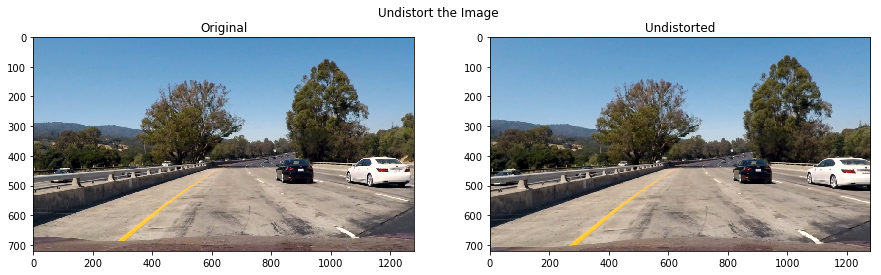

In [12]:
image = mpimg.imread('./test_images/test1.jpg')
undist_image = cv2.undistort(image, mtx, dist, None, mtx)
pltu.plot_compare_two_images(image, undist_image, 
                             suptitle='Undistort the Image', 
                             subtitle1='Original', subtitle2='Undistorted',
                            is_save=True, save_path="./output_images/chessboard_undistort.png")


# Warp the Image - Perspective Transform

### Import the perspective_transformer

In [14]:
import src.perspective_transformer as ppt

### Checked Warped Image

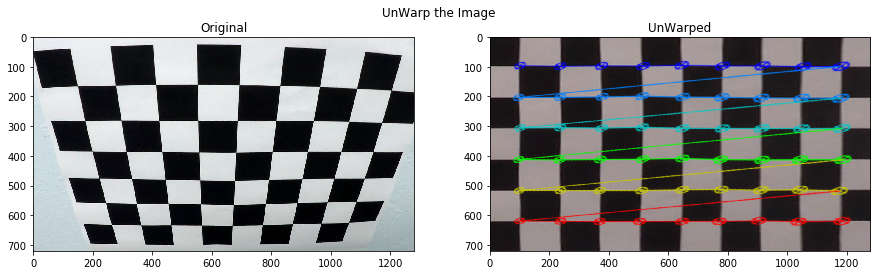

In [17]:
# Check warped image
image = cv2.imread('./camera_cal/calibration2.jpg')
warped, M, Minv = ppt.corners_unwarp(img, mtx, dist, nx=9, ny=6)

pltu.plot_compare_two_images(image, warped, 
                             suptitle='UnWarp the Image', 
                             subtitle1='Original', subtitle2='UnWarped',
                            is_save=True, save_path="./output_images/chessboard_unwarped.png")

# Thresholding - Color and Gradient

## Sobel Filter

### Import Sobel Filter

In [18]:
import src.sobel_thresholder as sbt

### Applying the Sobel Filter

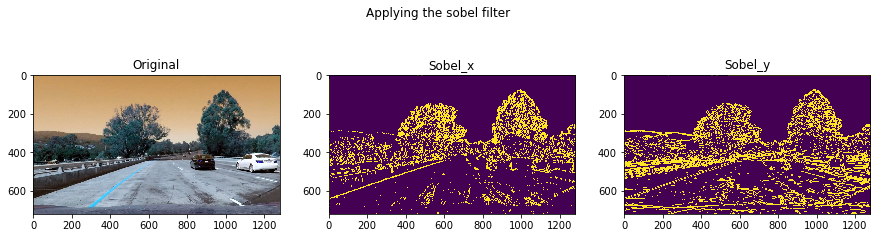

In [19]:
# Sample image
image = cv2.imread('./test_images/test1.jpg')
sobel_x_binary = sbt.abs_sobel_thresh(image, orient='x', sobel_kernel=15, thres=(15, 100))
sobel_y_binary = sbt.abs_sobel_thresh(image, orient='y', sobel_kernel=15, thres=(15, 100))

pltu.plot_compare_three_images(image, sobel_x_binary, sobel_y_binary,
                             suptitle='Applying the sobel filter', 
                             subtitle1='Original', subtitle2='Sobel_x', subtitle3='Sobel_y',
                            is_save=True, save_path="./output_images/abs_sobel.png")

# pltu.plot_compare_three_images_from_n(image, sobel_x_binary, sobel_y_binary,
#                              suptitle='Applying the sobel filter', 
#                              subtitle1='Original', subtitle2='Sobel_x', subtitle3='Sobel_y',
#                             is_save=True, save_path="./output_images/abs_sobel.png")

### Magnitude of the Gradient

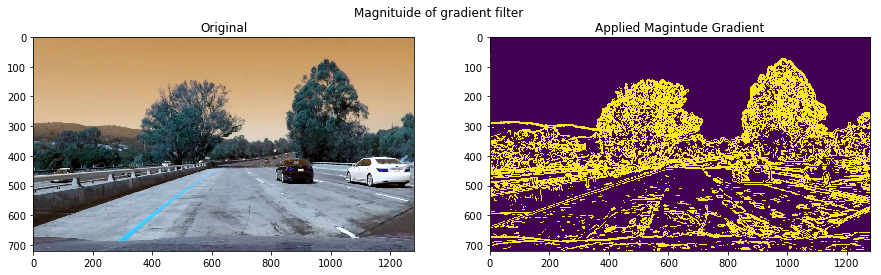

In [20]:
# Sample image
img = cv2.imread('./test_images/test1.jpg')
mag_binary = sbt.mag_thresh(img, sobel_kernel=15, thres=(15, 100))

pltu.plot_compare_two_images(img, mag_binary, 
                             suptitle='Magnituide of gradient filter', 
                             subtitle1='Original', subtitle2='Applied Magintude Gradient',
                            is_save=True, save_path="./output_images/magnitude_threshold.png")

### Direction of the Gradient


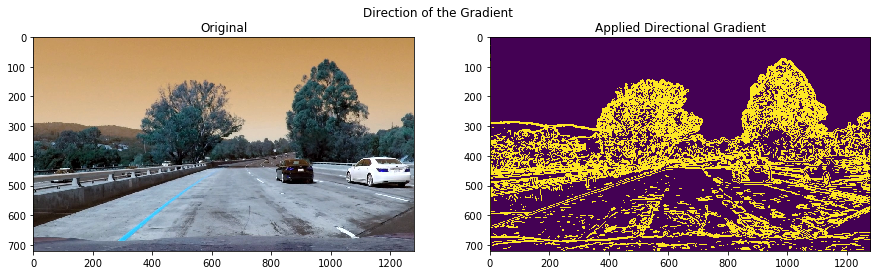

In [21]:
# Sample image
img = cv2.imread('./test_images/test1.jpg')
dir_mask = sbt.dir_threshold(img, sobel_kernel=15, thres=(0.7, 1.1))

pltu.plot_compare_two_images(img, mag_binary, 
                             suptitle='Direction of the Gradient', 
                             subtitle1='Original', subtitle2='Applied Directional Gradient',
                            is_save=True, save_path="./output_images/direction_threshold.png")

### Combine gradient filters

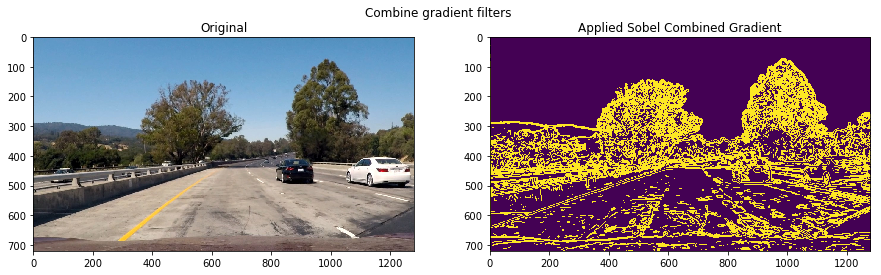

In [22]:
img = mpimg.imread('./test_images/test1.jpg')
combined = sbt.apply_gradient_filters(img, sobel_kernel=15, abs_thres=(20,100), 
                                                 mag_thres=(30, 100), dir_thres=(0.7, 1.3))

pltu.plot_compare_two_images(img, mag_binary, 
                             suptitle='Combine gradient filters', 
                             subtitle1='Original', subtitle2='Applied Sobel Combined Gradient',
                            is_save=True, save_path="./output_images/combined_sobel.png")

## Color Spaces

### Importing the Color Thresholder

In [23]:
import src.color_thresholder as cth

### HLS Color Space

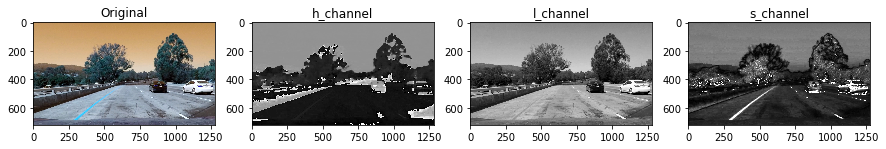

In [26]:
img = cv2.imread('./test_images/test1.jpg')
channel='HLS'
h_channel, l_channel, s_channel  = cth.split_channels(img, channel)

# Plotting now
images = [img, h_channel, l_channel, s_channel]
subtitles = ['Original', 'h_channel', 'l_channel', 's_channel']
pltu.plot_compare_n_images_grayed( images, suptitle=channel, 
                             subtitles=subtitles,grayed_array=[False, True, True, True],
                            is_save=True, save_path='./output_images/'+channel+'_demo.png')


### HSV color space

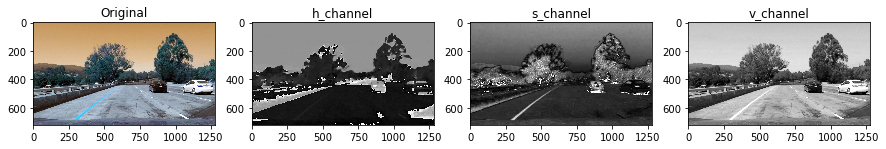

In [27]:
img = cv2.imread('./test_images/test1.jpg')
channel='HSV'
h_channel, s_channel, v_channel  = cth.split_channels(img, channel)

# Plotting now
images = [img, h_channel, s_channel, v_channel]
subtitles = ['Original', 'h_channel', 's_channel', 'v_channel']
pltu.plot_compare_n_images_grayed( images, suptitle=channel, 
                             subtitles=subtitles,grayed_array=[False, True, True, True],
                            is_save=True, save_path='./output_images/'+channel+'_demo.png')

### YCrCb color space

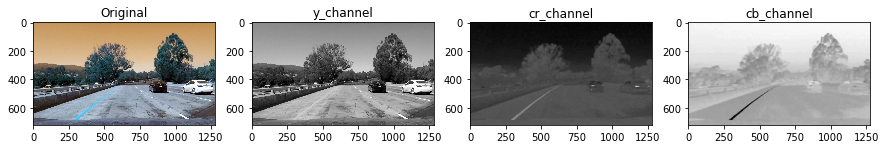

In [28]:
img = cv2.imread('./test_images/test1.jpg')
channel='YCrCb'
y_channel, cr_channel, cb_channel  = cth.split_channels(img, channel)

# Plotting now
images = [img, y_channel, cr_channel, cb_channel]
subtitles = ['Original', 'y_channel', 'cr_channel', 'cb_channel']
pltu.plot_compare_n_images_grayed( images, suptitle=channel, 
                             subtitles=subtitles,grayed_array=[False, True, True, True],
                            is_save=True, save_path='./output_images/'+channel+'_demo.png')

### YUV color space

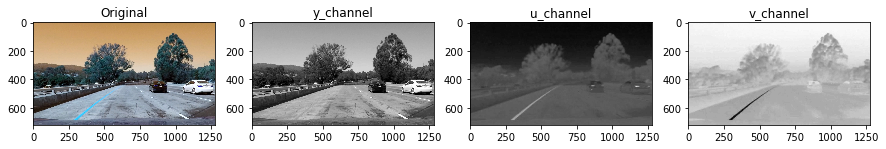

In [29]:
img = cv2.imread('./test_images/test1.jpg')
channel='YUV'
y_channel, u_channel, v_channel  = cth.split_channels(img, channel)

# Plotting now
images =            [img, y_channel, u_channel, v_channel]
subtitles = ['Original', 'y_channel', 'u_channel', 'v_channel']
pltu.plot_compare_n_images_grayed( images, suptitle=channel, 
                             subtitles=subtitles,grayed_array=[False, True, True, True],
                            is_save=True, save_path='./output_images/'+channel+'_demo.png')

### LUV color space

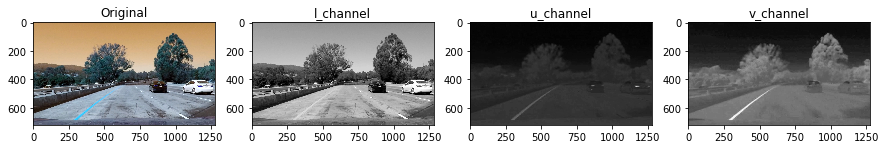

In [30]:
img = cv2.imread('./test_images/test1.jpg')
channel='LUV'
l_channel, u_channel, v_channel  = cth.split_channels(img, channel)

# Plotting now
images = [img, l_channel, u_channel, v_channel]
subtitles = ['Original', 'l_channel', 'u_channel', 'v_channel']
pltu.plot_compare_n_images_grayed( images, suptitle=channel, 
                             subtitles=subtitles,grayed_array=[False, True, True, True],
                            is_save=True, save_path='./output_images/'+channel+'_demo.png')

## Final Thresholder

### Importing the final thresholder

In [31]:
import src.final_thresholder as fth

### Example of Color Thresholder

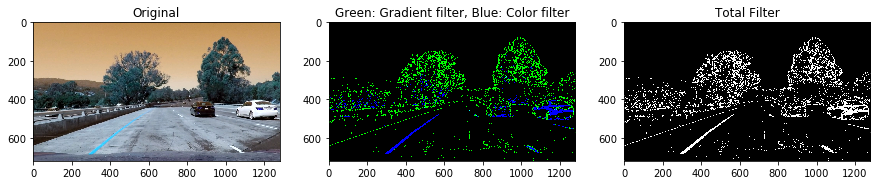

In [32]:
# Show example
img = cv2.imread('./test_images/test1.jpg')
color_binary, combined_binary = fth.grad_color_threshold(img)


images = [img, color_binary, combined_binary]
subtitles = ['Original', 'Green: Gradient filter, Blue: Color filter', 'Total Filter']
grayed = [False, True, True]

pltu.plot_compare_n_images_grayed( images, suptitle=channel, 
                             subtitles=subtitles,grayed_array=grayed,
                            is_save=True, save_path='./output_images/combined_filters_demo.png')

## Back to Perspective Transfomation - Finding Corners

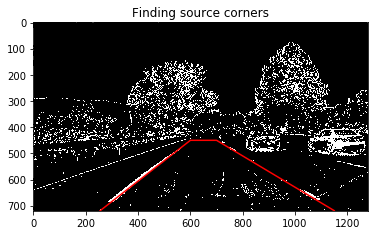

In [43]:
# Show example
img = mpimg.imread('./test_images/test1.jpg')
_, combined_binary = fth.grad_color_threshold(img)
plt.imshow(combined_binary, cmap='gray')
plotted = plt.plot([255, 600, 700, 1150], [719, 450, 450, 719], 'r-')
plt.title('Finding source corners')
plt.savefig('./output_images/src_corners.png', bbox_inches='tight')

### Running the Perspective Transform on the Test Image

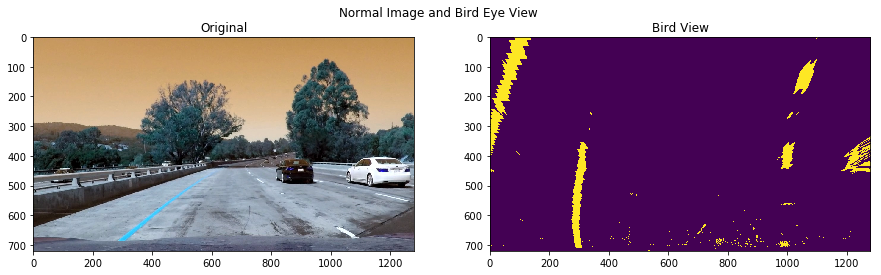

In [44]:
src_corners = [
    [600, 450],  # top left
    [700, 450],  # top right
    [1150, 719], # bottom right
    [255, 719]   # bottom left
]

offset=(300, 0)

binary_warped, Minv = ppt.transform_with_offset(combined_binary.astype(np.uint8), src_corners, offset=offset)

img = cv2.imread('./test_images/test1.jpg')
pltu.plot_compare_two_images(img, binary_warped, 
                             suptitle='Normal Image and Bird Eye View', 
                             subtitle1='Original', subtitle2='Bird View',
                             is_save=True, save_path="./output_images/warped.png")

## Draw Histogram to identify lanes and Fit Polynomial to Sliding Windows

### Importing the Lane Detector

In [64]:
import src.lane_detector as ldt

### Testing the Lane Detector

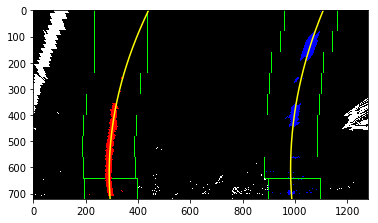

In [65]:
left_fitx, right_fitx, ploty, left_fit, right_fit = ldt.find_lane_lines(binary_warped, visualize=True)
plt.savefig('./output_images/sliding_windows1.png', bbox_inches='tight')

## Measuring curvature

In [66]:
# show sample curvature
ldt.get_curvature_radius(left_fitx, right_fitx, ploty)

(454.89044597131067, 426.25238355362814, 483.52850838899315)

## Measuring off center

In [68]:
ldt.get_off_center(img, left_fit, right_fit)

0.00436482560443499

## Visualize detected lane

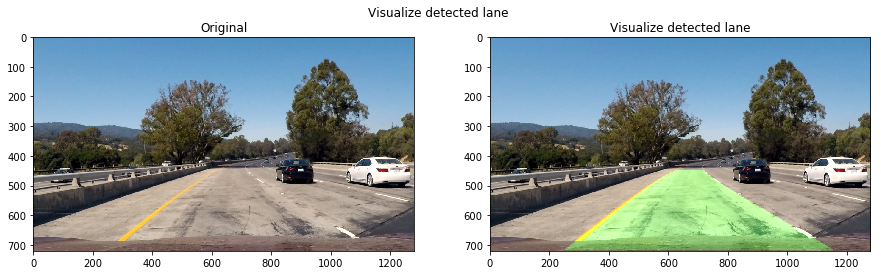

In [69]:
# show example
img = mpimg.imread('./test_images/test1.jpg')
colored_binary, combined_binary = fth.grad_color_threshold(img)

corners = [
    [600, 450],  # top left
    [700, 450],  # top right
    [1150, 719], # bottom right
    [255, 719]   # bottom left
]

binary_warped, Minv = ppt.transform_with_offset(combined_binary.astype(np.uint8), corners)
result = ldt.show_inside_lane(img, binary_warped, Minv, left_fitx, right_fitx, ploty)

pltu.plot_compare_two_images(img, result, 
                             suptitle='Visualize detected lane', 
                             subtitle1='Original', subtitle2='Visualize detected lane',
                             is_save=True, save_path="./output_images/Visualize_detected_lane.png")

# Final Pipeline

### Import the pipline for 1 Image

In [70]:
import src.final_pipeline as fnp

## Test Pipeline

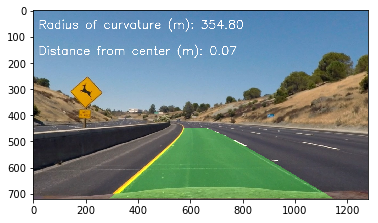

In [76]:
img = mpimg.imread('./test_images/test2.jpg')
corners = [
        [600, 450],  # top left
        [700, 450],  # top right
        [1150, 719], # bottom right
        [255, 719]   # bottom left
    ]
result = fnp.pipeline_for_image(img, mtx, dist, corners)

plt.imshow(result)
plt.savefig('./output_images/pipeline_result.png', bbox_inches='tight')

## Apply to video

In [77]:
output_video='output_video.mp4'
%time fnp.pipeline_for_video(mtx, dist, corners, output_video=output_video)

[MoviePy] >>>> Building video output_video.mp4
[MoviePy] Writing video output_video.mp4
[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video.mp4 

CPU times: user 6min 15s, sys: 1min 24s, total: 7min 40s
Wall time: 5min 34s


## Display Video

In [80]:
from IPython.display import HTML
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))

## Challenge Video

### Testing the challenge 1

In [82]:
input_video='challenge_video.mp4'
output_video="out_"+input_video

%time fnp.pipeline_for_video(mtx, dist, corners, input_video=input_video, output_video=output_video)

[MoviePy] >>>> Building video out_challenge_video.mp4
[MoviePy] Writing video out_challenge_video.mp4
[MoviePy] Done.
[MoviePy] >>>> Video ready: out_challenge_video.mp4 

CPU times: user 5min 50s, sys: 1min 22s, total: 7min 13s
Wall time: 5min 57s


### Testing the challenge 2

In [83]:
input_video='harder_challenge_video.mp4'
output_video="out_"+input_video

%time fnp.pipeline_for_video(mtx, dist, corners, input_video=input_video, output_video=output_video)

[MoviePy] >>>> Building video out_harder_challenge_video.mp4
[MoviePy] Writing video out_harder_challenge_video.mp4
[MoviePy] Done.
[MoviePy] >>>> Video ready: out_harder_challenge_video.mp4 

CPU times: user 5min 57s, sys: 1min 17s, total: 7min 14s
Wall time: 6min 57s
